# California housing dataset
Exploratory analysis on sklearn california housing dataset.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

# Feature and target understanding

The california housing dataset is a real-work dataset.  
Sklearn makes this available as Bunch (dictioanary) object.  

In [3]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
print(housing.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [5]:
housing.data.shape

(20640, 8)

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
print(housing.target_names)

['MedHouseVal']


# Exploratory Analysis

Housing dataset is an np.array  
Put it in a dataframe to enable a little easier analysis.

In [8]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [9]:
housing_df[housing.target_names[0]] = housing.target

## Sample Data

In [10]:
# simply take a quick look at a few rows of data.
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Basic Statistics

In [11]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Histograms

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

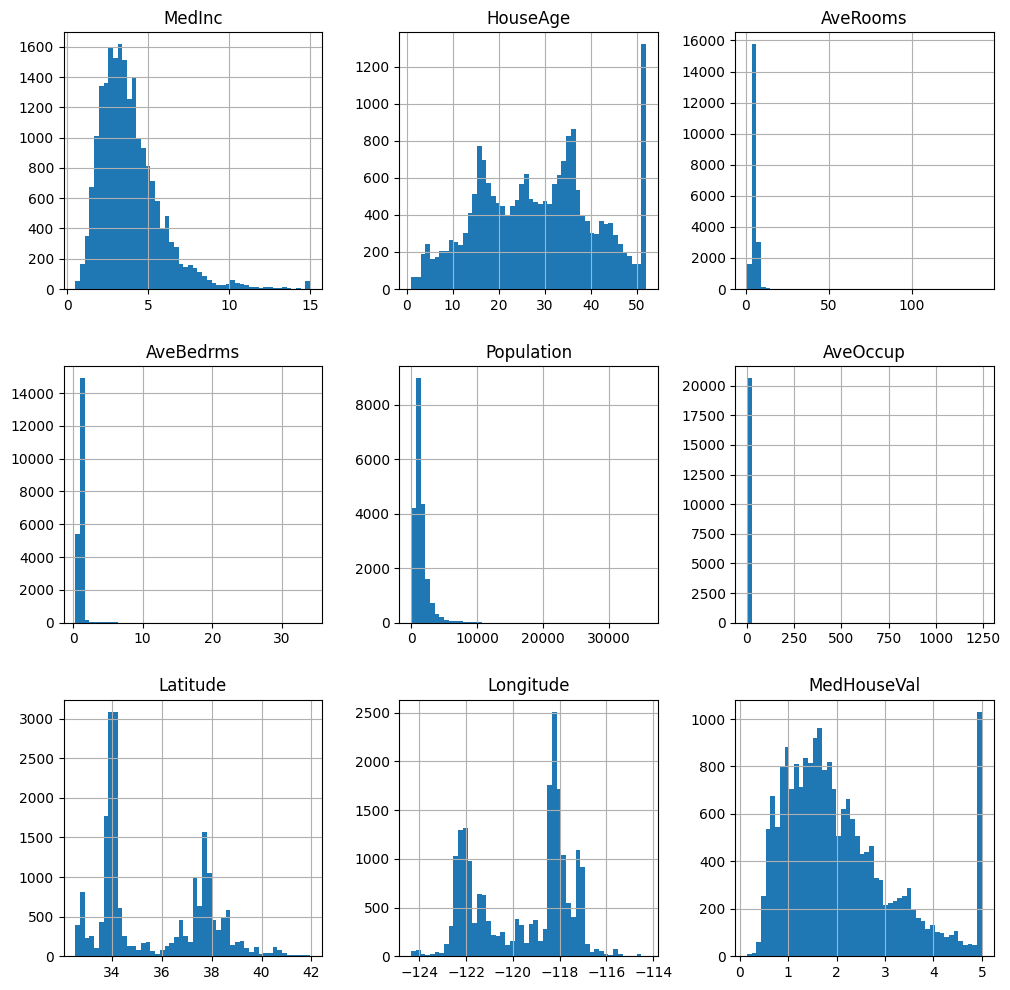

In [12]:
housing_df.hist(bins=50, figsize=(12,12))

## Correlation plots

The next most important thing to understand is how the features are correlated to the MedHouseVal.

Some notes on the below correlation plots.

This is attempting to show linear relationships between input feature and target.  Therefore Latitude and Longitude are not relevant for these plots.  Latitude and Longitude must be considered together and are likely not linearly related to MedHouseVal.  

The feature showing the strongest correlation to MedHouseVal is MedInc.  This makese sense as groups with larger incomes will likely live in a more valuable house.  This could also be used as proxy for latitude/longitude or vice-versa likely making those features less valuable.

The remaining features and this EDA is based in part on intuition and asking ourselves if the data aligns with our intuition.  

HouseAge - Shows a weak positive correlation implying that older houses are more valuable.  In actuallity the correlation is so weak that even as houses age the value barely get above the median.  This feature likely has little predictive power.

AveRooms - Shows a strong positive correlation indicating houses with more rooms are more valuable.  This makes some sense; however the correlation is skewed by some outliers.  Many homes up and down the MedHouseVal scale are valuable.  

AveBedRooms - Shows a strong negative correlation, which is peculiar.  Human intuition would tell us that as the number of bedrooms increases a house gets more valuable.

Population - This shows a somewhat weak negative correlation between population density and a homes value.  This aligns with intuition, unfortunately, that the poor live in areas of high density and the wealthy do not.

AvgOcc - This shows a strong negative correlation between the number of people living in a house and the houses value.  A little sad, but likely true.

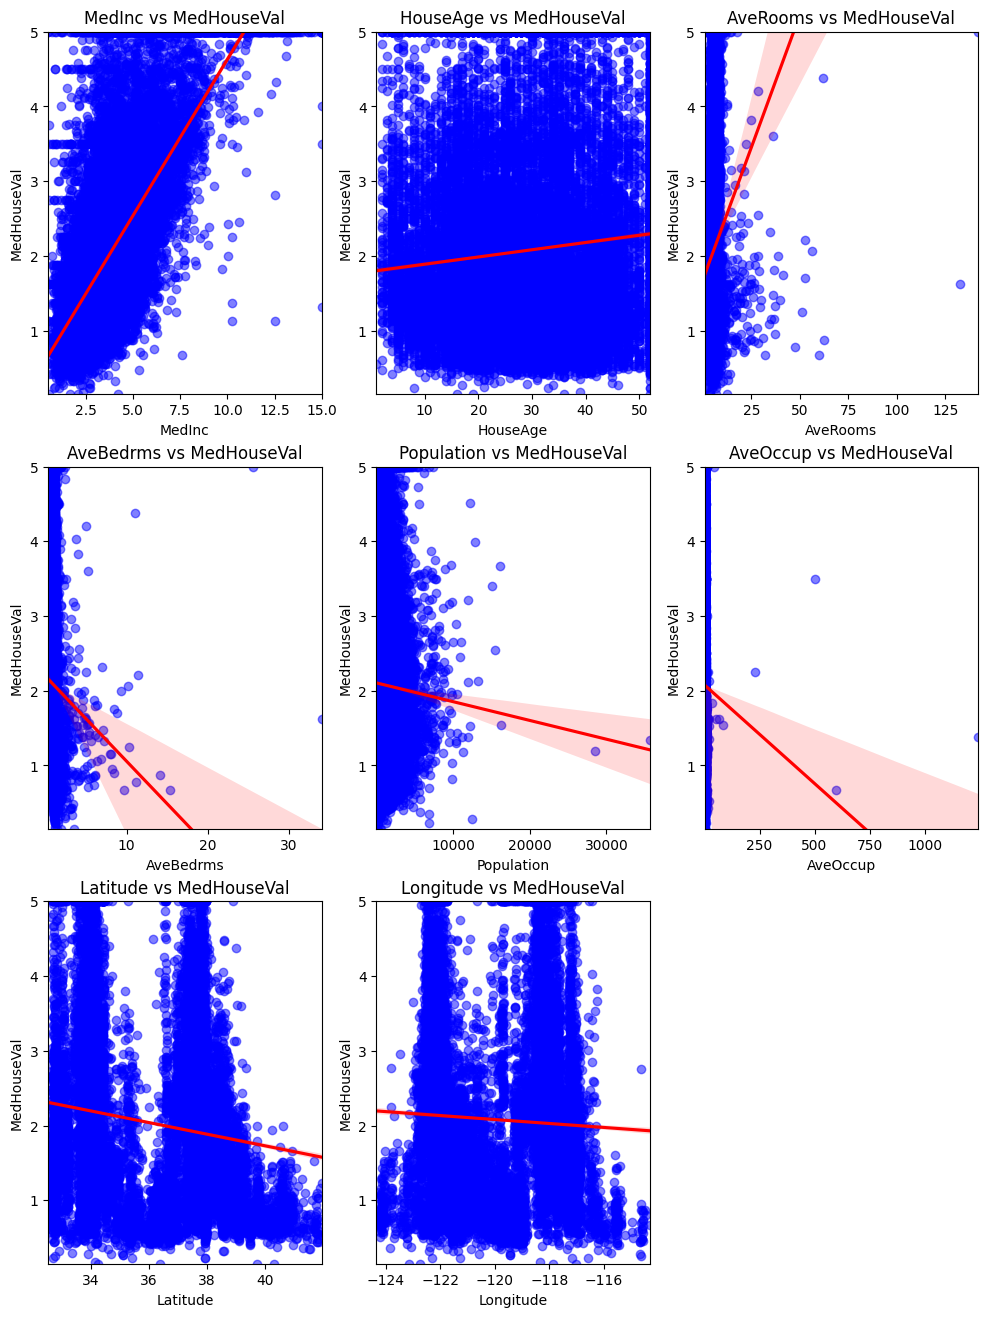

In [13]:
# Do some basic calculations to determine the number of plots and layout
n_cols = 3
n_rows = (len(housing_df.columns) - 1) // n_cols + 1
# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 16))
# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(housing_df.columns):
    if col != housing.target_names[0]:
        sns.regplot(data=housing_df, 
                    x=col, 
                    y=housing.target_names[0], 
                    ax=axes[i],
                    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Adjust points color and transparency
                    line_kws={'color': 'red'},  # Adjust regression line color
                    truncate=True)

        axes[i].set_title(f"{col} vs {housing.target_names[0]}")

        # Adjust x-axis limits to fit data points
        axes[i].autoscale(enable=True, axis='x', tight=True)

        # Adjust x-axis limits to fit data points
        y_min, y_max = housing_df[housing.target_names[0]].min(), housing_df[housing.target_names[0]].max()
        axes[i].set_ylim(y_min, y_max)

# Remove empty subplots
for i in range(len(housing_df.columns) - 1, len(axes)):
    fig.delaxes(axes[i])

#plt.tight_layout()
plt.show()
